# Simultaneous localization and mapping

Hi! I'm a problem set.

In [1]:
# Hi! I'm some code.

import sys
#!{sys.executable} -m pip install numpy scipy matplotlib

import numpy

In [2]:
# robot dynamics

def rot_mat(theta):
    return numpy.array([[numpy.cos(theta), -numpy.sin(theta)], [numpy.sin(theta), numpy.cos(theta)]])

class Robot:
    '''
    .x: position x, y, theta (in *WORLD* frame, +x = "to the right", +theta = "counterclockwise", )
    .u: requested velocity (in *ROBOT* frame, +x = "forward", robot starts pointing "right")
    '''
    def __init__(self):
        self.x = numpy.array([[0], [0], [0]])
        self.u = numpy.array([[0], [0], [0]])
        
    def pos(self):
        return self.x[0:2]
    
    def theta(self):
        return self.x[2][0]
    
    def dpos(self):
        return self.u[0:2]
    
    def dtheta(self):
        return self.u[2][0]
    
    def request_control(self, dx, dy, du):
        '''alias for foo.u = u'''
        self.u = numpy.array([[dx], [dy], [du]])
        
    def step(self, dt):
        vel = numpy.dot(rot_mat(self.theta()), self.dpos()) * dt
        
        self.x = numpy.concatenate([
            self.pos() + vel,
            numpy.array([[self.theta() + self.dtheta() * dt]])
        ])

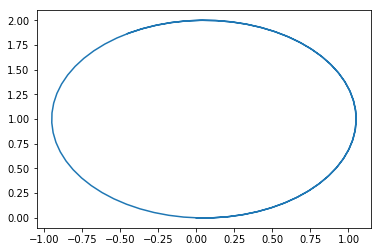

In [5]:
# basic robot test

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

dt = 0.1

r = Robot()

r.request_control(1, 0, 1)

trace = r.pos()

for i in range(100):
    r.step(dt)
    trace = numpy.concatenate([trace, r.pos()], 1)
    
plt.plot(trace[0], trace[1])
plt.show()
